
# **Forest change analysis in the Evros region using Landsat 8 satellite data   and Google Earth Engine Tools**


This Colab was made as an addition to my thesis with the same title.


Name: Styliani Rafaela Maladaki

-----------------------------------------------------------------------
-----------------------------------------------------------------------

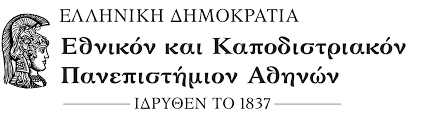

-----------------------------------------------------------------------
-----------------------------------------------------------------------


NATIONAL AND KAPODISTRIAN UNIVERSITY  OF ATHENS

SCHOOL OF SCIENCE

DEPARTMENT OF AEROSPACE SCIENCE AND TECHNOLOGY



# IMPORTS

In [222]:
#IMPORTS
import ee
import geemap
import folium
from IPython.display import Image
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim

In [223]:
# Authenticating and Initializing the Earth Engine module.
ee.Authenticate()
ee.Initialize()

#ACQUIRING THE DATA

## Region of interest

In [224]:
#Geting the shapefile for The Global Administrative Unit Layers (GAUL) lvl 2 (regional units )
gaul_feature_collection=ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level2")
evrou_feature_collection = gaul_feature_collection.filter(ee.Filter.eq('ADM2_NAME', 'Evrou'))
#Protected aerias from : https://www.ecothraki.gr/%CE%B8%CF%81%CE%B1%CE%BA%CE%B7/%CF%86%CF%85%CF%83%CE%B9%CE%BA%CE%BF%CF%82-%CF%80%CE%BB%CE%BF%CF%85%CF%84%CE%BF%CF%82/%CE%B4%CE%AF%CE%BA%CF%84%CF%85%CE%BF-natura-2000/
table_DA = ee.FeatureCollection("projects/ee-maladakistella/assets/DA_EVROS")
table_DD = ee.FeatureCollection("projects/ee-maladakistella/assets/DD_Evros")
region_merger=table_DA.merge(table_DD) #merging ΔΑ AND ΔΔ tables

# Displaying the shapefiles
Map = geemap.Map()

Map.addLayer(region_merger, {'color':'black'}, 'Merged Region')

Map.addLayer(table_DD, {'color':'yellow'}, 'ΔΔ region')
Map.addLayer(table_DA, {'color':'red'}, 'ΔΑ region')

Map.centerObject(region_merger, 10)


Map.addLayerControl()
Map

Map(center=[41.100912807399546, 26.036034974720206], controls=(WidgetControl(options=['position', 'transparent…

In [225]:
region=evrou_feature_collection
#image 1
image_1=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2013-06-01','2013-06-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite = ee.Algorithms.Landsat.simpleComposite(collection=image_1, asFloat=True)
composite=composite.clip(region_merger)
#image 2
image_2=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2017-07-01','2017-07-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')
composite_2 = ee.Algorithms.Landsat.simpleComposite(collection=image_2, asFloat=True)
composite_2=composite_2.clip(region_merger)
#image 3
image_3=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2023-09-01','2023-09-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')

composite_3 = ee.Algorithms.Landsat.simpleComposite(collection=image_3, asFloat=True)
composite_3=composite_3.clip(region_merger)

#displaying the bands of image composite_3
composite_3



In [226]:
Map = geemap.Map()
composite_3_2 = ee.Algorithms.Landsat.simpleComposite(collection=image_1, asFloat=True)
# in landsat 8 B4 B3 B2 are the Red Green Blue
Map.addLayer(composite_3_2, {'min':0,'max':0.3,'bands': ['B4', 'B3', 'B2'],'gamma':1.4}, '2023-09-01_composite')
Map.addLayer(composite_3_2.clip(region_merger), {'min':0,'max':0.3,'bands': ['B4', 'B3', 'B2'],'gamma':1.4}, '2023-09-01_cliped')

Map.centerObject(region_merger, 9)
Map.addLayerControl()
Map

Map(center=[41.100912807399546, 26.036034974720206], controls=(WidgetControl(options=['position', 'transparent…

## Geting the image composites for the summer munths for the decate 2013 to 2023  

* how were the dates chosen ?


In [227]:
image_2013 =ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2013-06-01','2013-06-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite_2013 = ee.Algorithms.Landsat.simpleComposite(collection=image_2013, asFloat=True)
composite_2013=composite_2013.clip(region_merger)


image_2014=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2014-06-01','2014-06-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite_2014 = ee.Algorithms.Landsat.simpleComposite(collection=image_2014, asFloat=True)
composite_2014=composite_2014.clip(region_merger)


image_2015 =ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2015-07-01','2015-07-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite_2015 = ee.Algorithms.Landsat.simpleComposite(collection=image_2015, asFloat=True)
composite_2015=composite_2015.clip(region_merger)

image_2016 =ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2016-06-01','2016-06-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\


composite_2016 = ee.Algorithms.Landsat.simpleComposite(collection=image_2016, asFloat=True)
composite_2016=composite_2016.clip(region_merger)

image_2017 =ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2017-08-01','2017-08-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite_2017 = ee.Algorithms.Landsat.simpleComposite(collection=image_2017, asFloat=True)
composite_2017=composite_2017.clip(region_merger)

image_2018 =ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2018-08-01','2018-08-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\


composite_2018 = ee.Algorithms.Landsat.simpleComposite(collection=image_2018, asFloat=True)
composite_2018=composite_2018.clip(region_merger)

In [228]:
image_2019=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2019-08-01','2019-08-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite_2019 = ee.Algorithms.Landsat.simpleComposite(collection=image_2019, asFloat=True)
composite_2019=composite_2019.clip(region_merger)

image_2020=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2020-07-01','2020-07-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite_2020 = ee.Algorithms.Landsat.simpleComposite(collection=image_2020, asFloat=True)
composite_2020=composite_2020.clip(region_merger)

In [229]:
image_2021=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2021-07-01','2021-07-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\

composite_2021 = ee.Algorithms.Landsat.simpleComposite(collection=image_2021, asFloat=True)
composite_2021=composite_2021.clip(region_merger)

image_2022=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2022-07-01','2022-07-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\


composite_2022 = ee.Algorithms.Landsat.simpleComposite(collection=image_2022, asFloat=True)
composite_2022=composite_2022.clip(region_merger)

image_2023=ee.ImageCollection("LANDSAT/LC08/C02/T1_RT")\
.filterDate('2023-08-01', '2023-08-30')\
.filterBounds(region)\
.sort('CLOUD_COVER')\


composite_2023 = ee.Algorithms.Landsat.simpleComposite(collection=image_2023, asFloat=True)
composite_2023=composite_2023.clip(region_merger)

#Feature Extraction
 Calculating NDVI BSI and adding it to the composites

In [230]:

def calculate_ndvi(image):
    # Select the NIR and Red bands
    nir = image.select('B5')  #  Band 5 is NIR
    red = image.select('B4')  #  Band 4 is Red

    # Calculate NDVI
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    # Overwrite the image with the new NDVI band
    return image.addBands(ndvi, overwrite=True)


def calculate_bsi(image):
    # BSI (Landsta 8) = (B6 + B4) – (B5 + B2) / (B6 + B4) + (B5 + B2)=> a-b/a+b
    A = image.select('B6').add(image.select('B4'))
    B= image.select('B5').add(image.select('B2'))
    bsi = A.subtract(B).divide(A.add(B)).rename('BSI')
    # Overwrite the image with the new BSI band
    return image.addBands(bsi, overwrite=True)


In [231]:
# Calculating NDVI and BSI for every composite
composite = calculate_ndvi(composite)
composite = calculate_bsi(composite)

composite_2 = calculate_ndvi(composite_2)
composite_2 = calculate_bsi(composite_2)

composite_3 = calculate_ndvi(composite_3)
composite_3 = calculate_bsi(composite_3)



In [232]:
composite_2013 = calculate_ndvi(composite_2013)
composite_2013 = calculate_bsi(composite_2013)

composite_2014 = calculate_ndvi(composite_2014)
composite_2014 = calculate_bsi(composite_2014)

composite_2015 = calculate_ndvi(composite_2015)
composite_2015 = calculate_bsi(composite_2015)


composite_2016 = calculate_ndvi(composite_2016)
composite_2016 = calculate_bsi(composite_2016)

composite_2017 = calculate_ndvi(composite_2017)
composite_2017 = calculate_bsi(composite_2017)

composite_2018 = calculate_ndvi(composite_2018)
composite_2018 = calculate_bsi(composite_2018)



composite_2019 = calculate_ndvi(composite_2019)
composite_2019 = calculate_bsi(composite_2019)

composite_2020 = calculate_ndvi(composite_2020)
composite_2020 = calculate_bsi(composite_2020)


composite_2021 = calculate_ndvi(composite_2021)
composite_2021 = calculate_bsi(composite_2021)

composite_2022 = calculate_ndvi(composite_2022)
composite_2022 = calculate_bsi(composite_2022)

composite_2023 = calculate_ndvi(composite_2023)
composite_2023 = calculate_bsi(composite_2023)
composite_2023

In [233]:
training = ee.FeatureCollection('projects/ee-maladakistella/assets/Samples_final')#training samples where extracted using Google Earth Engine Code Editor
class_0_features = training.filter(ee.Filter.eq('class', 0))

class_1_features = training.filter(ee.Filter.eq('class', 1))
class_2_features = training.filter(ee.Filter.eq('class', 2))

class_3_features = training.filter(ee.Filter.eq('class', 3))


In [234]:
bands_of_interest = ['B4', 'B3', 'B2','NDVI','BSI']
clipped_image_1=composite_2.clip(class_0_features)
clipped_image_2=composite_2.clip(class_1_features)
clipped_image_3=composite_2.clip(class_2_features)
clipped_image_4=composite_2.clip(class_3_features)

# Function to extract values from Earth Engine dictionaries and convert to NumPy arrays
def extract_values(ee_dict):
    # Extract values from the dictionary
    values = ee_dict.getInfo().values()
    # Convert to NumPy array and flatten
    return np.concatenate([np.array(value) for value in values])

# Extract values from Earth Engine dictionaries
band_data_1 = clipped_image_1.select(bands_of_interest).reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=class_0_features,
    scale=30
)
band_data_2 = clipped_image_2.select(bands_of_interest).reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=class_1_features,
    scale=30
)
band_data_3 = clipped_image_3.select(bands_of_interest).reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=class_2_features,
    scale=30
)
band_data_4 = clipped_image_4.select(bands_of_interest).reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=class_3_features,
    scale=30
)
def similarity_compute(list_first, list_second):
   first=list_first['B4']+list_first['B3']+list_first['B2']+list_first['BSI']+list_first['NDVI']
   second=list_second['B4']+list_second['B3']+list_second['B2']+list_second['BSI']+list_second['NDVI']
   # Compute the intersection from the first and second list
   intersected_items = set(first).intersection(second)
   # Compute the similarity percentage among the two list
   lengthOfItersectedItems = len(intersected_items)
   similarity_percentage = (lengthOfItersectedItems / ((len(first) + len(second)) / 2)) * 100
   # Return the result
   return similarity_percentage

print(f'similarity of water and bare land {similarity_compute(band_data_1.getInfo(),band_data_2.getInfo()):.3f}%')
print(f'similarity of water and dence forest  {similarity_compute(band_data_1.getInfo(),band_data_3.getInfo()):.3f}%')
print(f'similarity of bare land  and dence forest {similarity_compute(band_data_2.getInfo(),band_data_3.getInfo()):.3f}%')
print(f'similarity of light forest land  and dence forest {similarity_compute(band_data_4.getInfo(),band_data_3.getInfo()):.3f}%')
print(f'similarity of light forest land  and bare land {similarity_compute(band_data_4.getInfo(),band_data_2.getInfo()):.3f}%')
print(f'similarity of light forest land  and water {similarity_compute(band_data_4.getInfo(),band_data_1.getInfo()):.3f}%')

values1 = extract_values(band_data_1)
values2 = extract_values(band_data_2)

similarity of water and bare land 0.005%
similarity of water and dence forest  0.037%
similarity of bare land  and dence forest 0.015%
similarity of light forest land  and dence forest 0.750%
similarity of light forest land  and bare land 0.031%
similarity of light forest land  and water 0.032%


In [235]:
def calculate_means(feature):
  bands_of_interest = ['B4', 'B3', 'B2','NDVI','BSI']

  # Get data for specific bands
  clipped_image=composite_2.clip(feature)
  band_data = clipped_image.select(bands_of_interest).reduceRegion(
      reducer=ee.Reducer.toList(),
      geometry=feature,
      scale=30
  )

  # Convert the result to a Python dictionary
  band_data_ndvi = band_data.getInfo()['NDVI']
  band_data_BSI = band_data.getInfo()['BSI']
  print('mean ndvi',np.mean(band_data_ndvi))
  print('mean bsi',np.mean(band_data_BSI))

In [236]:
label='class'
bands=['B4','B3','B2','B5','NDVI','BSI']
input_2=composite_2.select(bands)

trainImage=input_2.sampleRegions(**{
    'collection':training,
    'properties':[label],
    'scale':30
})
trainingData=trainImage.randomColumn()
trainSet=trainingData.filter(ee.Filter.lessThan('random',0.8))
testSet=trainingData.filter(ee.Filter.greaterThanOrEquals('random',0.8))


In [237]:
vis_parameters = {'min':0,'max':0.3,'bands': ['B4', 'B3', 'B2'],'gamma':1.4}

#classify  RANDOM FOREST ----------------
input=composite.select(bands)
input_3=composite_3.select(bands)
classifier = ee.Classifier.smileRandomForest(4).train(trainSet,label,bands)
#clasified_2=input_2.classify(classifier)
clasified=input.classify(classifier)
clasified_3=input_3.classify(classifier)


#classify  MAHALANOBIS ----------------------
mah_classifier=ee.Classifier.minimumDistance('mahalanobis').train(trainSet,label,bands)
clasified_mah=input.classify(mah_classifier)
clasified_mah_3=input_3.classify(mah_classifier)

#classify  MINIMUM DISTANCE ----------------
md_classifier=ee.Classifier.minimumDistance().train(trainSet,label,bands)
clasified_md=input.classify(md_classifier)
clasified_md_3=input_3.classify(md_classifier)

# Define a land cover palette
landcover_palette = [
    'ffffff',  # Class 0: water
    'ff7f00',  # Class 1: bare_land
    '70BC6D',  # Class 2: light_forest
    '2c4b2b',  # Class 3: dense_forest

]

vis_parameters_class = {'palette': landcover_palette,'min':0,'max':3 }



# Acuracy assesment

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [239]:
clasified_2023=composite_2023.select(bands).classify(classifier) # the acuracy assesment is done on the last classified image



## RANDOM FOREST ACCURACY ASSESMENT

In [240]:
train_accuracy_rf = classifier.confusionMatrix()
print(train_accuracy_rf.getInfo())

print('overall acuracy',train_accuracy_rf.accuracy().getInfo())#Overall Accuracy
print('acuracy of classifications',train_accuracy_rf.kappa().getInfo())#acuracy of classifications
print(train_accuracy_rf.producersAccuracy().getInfo())

# Convert the confusion matrix to a NumPy array
confusion_matrix_rf = train_accuracy_rf.getInfo()
class_pairs = ['Class1 vs Class2', 'Class1 vs Class3','Class1 vs Class4']
class_pairs_1 = ['Class1 vs Class2','Class2 vs Class3', 'Class2 vs Class4']
class_pairs_2 = ['Class1 vs Class4','Class2 vs Class4','Class3 vs Class4']




[[980, 0, 1, 2], [1, 5894, 4, 19], [0, 15, 4771, 301], [1, 45, 486, 60950]]
overall acuracy 0.9880903770246359
acuracy of classifications 0.9589944977624462
[[0.9969481180061037], [0.9959445758702264], [0.9378808728130529], [0.9913470609284019]]


In [241]:
confusion_matrix = classifier.confusionMatrix()

# Calculate accuracy metrics
accuracy = confusion_matrix.accuracy().getInfo()
kappa = confusion_matrix.kappa().getInfo()
producers_accuracy = confusion_matrix.producersAccuracy().getInfo()
consumers_accuracy = confusion_matrix.consumersAccuracy().getInfo()

print(accuracy)
print(kappa)
print(producers_accuracy)
print(consumers_accuracy)

0.9880903770246359
0.9589944977624462
[[0.9969481180061037], [0.9959445758702264], [0.9378808728130529], [0.9913470609284019]]
[[0.9979633401221996, 0.9899227410144441, 0.9066894716837705, 0.9947447447447447]]


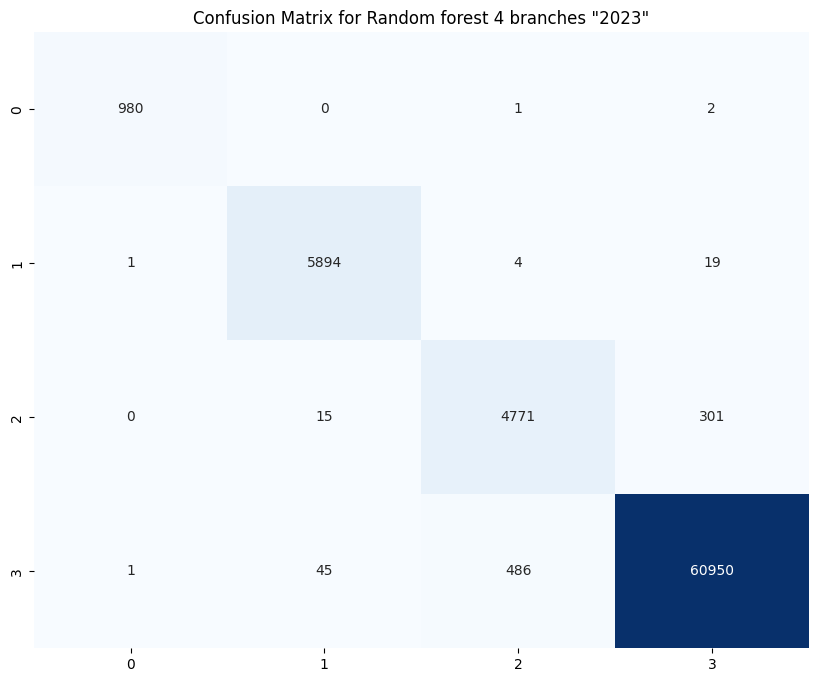

Class 1 - Sensitivity: 0.9969481180061037, Specificity: 0.999972408845724 -  F1:0.9974554707379135
Class 2 - Sensitivity: 0.9959445758702264, Specificity: 0.9991117953576504 -  F1:0.9929245283018868
Class 3 - Sensitivity: 0.9378808728130529, Specificity: 0.9928198528874136 -  F1:0.9220214513479563
Class 4 - Sensitivity: 0.9913470609284019, Specificity: 0.9731398064731398 -  F1:0.9930429965622302


In [242]:

train_accuracy=train_accuracy_rf
conf_matrix = np.array(train_accuracy.getInfo())

# Displaying the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random forest 4 branches "2023"')
plt.show()


if conf_matrix.shape == (4, 4):
    sensitivities = []
    specificities = []
    f1=[]
    for i in range(4):
        # Extracting values from the confusion matrix for the i-th class
        TN = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
        FP = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        FN = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
        TP = conf_matrix[i, i]

        # Calculating Sensitivity (Recall) for the i-th class
        sensitivity = TP / (TP + FN)
        sensitivities.append(sensitivity)

        # Calculating Specificity for the i-th class
        specificity = TN / (TN + FP)
        specificities.append(specificity)

        f1=2*TP/(2*TP+FN+FP)
        print(f"Class {i + 1} - Sensitivity: {sensitivity}, Specificity: {specificity} -  F1:{f1}")

else:
    print("Confusion matrix does not have the expected shape (4x4). Check the matrix.")


## MAHALANOBIS ACCURACY ASSESSMENT

In [243]:
train_accuracy_mah = mah_classifier.confusionMatrix()
print(train_accuracy_mah.getInfo())

print(train_accuracy_mah.accuracy().getInfo())
print(train_accuracy_mah.kappa().getInfo())#acuracy of classifications
print(train_accuracy_mah.producersAccuracy().getInfo())

confusion_matrix_mah = train_accuracy_mah.getInfo()

[[962, 1, 20, 0], [11, 5818, 89, 0], [0, 139, 4393, 555], [1, 406, 15873, 45202]]
0.767319994555601
0.4857518933671516
[[0.9786368260427264], [0.9831023994592768], [0.8635738156084136], [0.7352070524706418]]


In [244]:
confusion_matrix = mah_classifier.confusionMatrix()

# Calculating accuracy metrics
accuracy = confusion_matrix.accuracy().getInfo()
kappa = confusion_matrix.kappa().getInfo()
producers_accuracy = confusion_matrix.producersAccuracy().getInfo()

consumers_accuracy = confusion_matrix.consumersAccuracy().getInfo()

print(accuracy)
print(kappa)
print(producers_accuracy)
print(consumers_accuracy)

0.767319994555601
0.4857518933671516
[[0.9786368260427264], [0.9831023994592768], [0.8635738156084136], [0.7352070524706418]]
[[0.9876796714579056, 0.9142049025769956, 0.2156073619631902, 0.9878707083069257]]


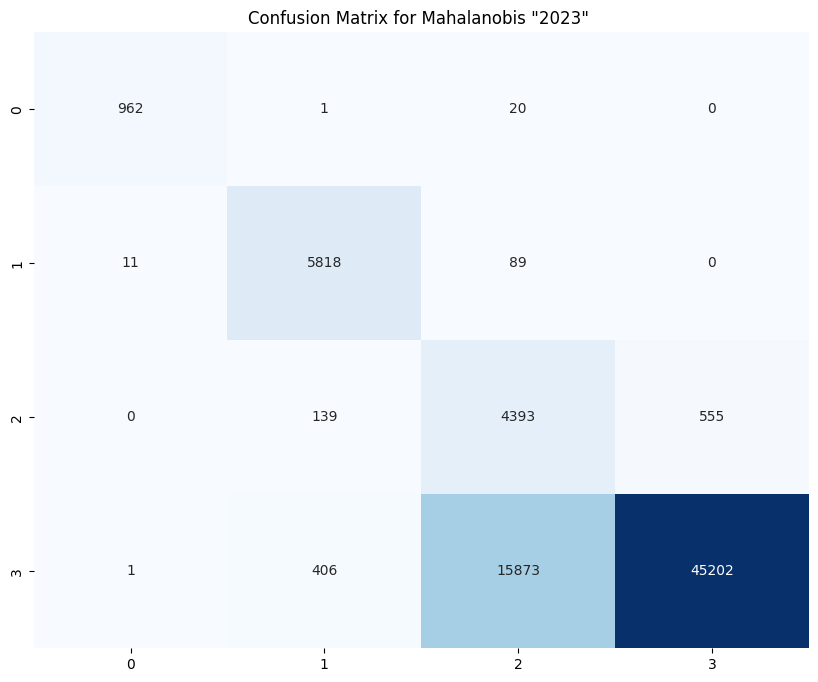

Class 1 - Sensitivity: 0.9786368260427264, Specificity: 0.9998344530743444 -  F1:0.9831374552887072
Class 2 - Sensitivity: 0.9831023994592768, Specificity: 0.9919173377546187 -  F1:0.9474027031428106
Class 3 - Sensitivity: 0.8635738156084136, Specificity: 0.7662869426611877 -  F1:0.3450632314822088
Class 4 - Sensitivity: 0.7352070524706418, Specificity: 0.9537037037037037 -  F1:0.843014201922808


In [245]:

train_accuracy=train_accuracy_mah
# Replace this with your actual confusion matrix
conf_matrix = np.array(train_accuracy.getInfo())

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Mahalanobis "2023" ')
plt.show()


# Assuming conf_matrix is your confusion matrix
if conf_matrix.shape == (4, 4):
    sensitivities = []
    specificities = []
    f1=[]
    for i in range(4):
        # Extracting values from the confusion matrix for the i-th class
        TN = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
        FP = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        FN = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
        TP = conf_matrix[i, i]

        # Calculating Sensitivity (Recall) for the i-th class
        sensitivity = TP / (TP + FN)
        sensitivities.append(sensitivity)

        # Calculating Specificity for the i-th class
        specificity = TN / (TN + FP)
        specificities.append(specificity)

        f1=2*TP/(2*TP+FN+FP)
        print(f"Class {i + 1} - Sensitivity: {sensitivity}, Specificity: {specificity} -  F1:{f1}")

else:
    print("Confusion matrix does not have the expected shape (4x4). Check the matrix.")

## MINIMUM DISTANCES ACCURACY ASSESSMENT

In [246]:
train_accuracy_md = md_classifier.confusionMatrix()
print(train_accuracy_md.getInfo())

print(train_accuracy_md.accuracy().getInfo())
print(train_accuracy_md.kappa().getInfo())#acuracy of classifications
print(train_accuracy_md.producersAccuracy().getInfo())
confusion_matrix_md = train_accuracy_md.getInfo()

[[948, 9, 26, 0], [0, 5751, 167, 0], [0, 146, 2655, 2286], [0, 202, 18753, 42527]]
0.706152170954131
0.36444542937476715
[[0.9643947100712106], [0.9717810070969922], [0.5219186160802044], [0.6916983832666471]]


In [247]:
confusion_matrix = md_classifier.confusionMatrix()

# Calculate accuracy metrics
accuracy = confusion_matrix.accuracy().getInfo()
kappa = confusion_matrix.kappa().getInfo()
producers_accuracy = confusion_matrix.producersAccuracy().getInfo()
consumers_accuracy = confusion_matrix.consumersAccuracy().getInfo()

print(accuracy)
print(kappa)
print(producers_accuracy)
print(consumers_accuracy)

0.706152170954131
0.36444542937476715
[[0.9643947100712106], [0.9717810070969922], [0.5219186160802044], [0.6916983832666471]]
[[1, 0.9415520628683693, 0.12291097634368779, 0.9489880168701047]]


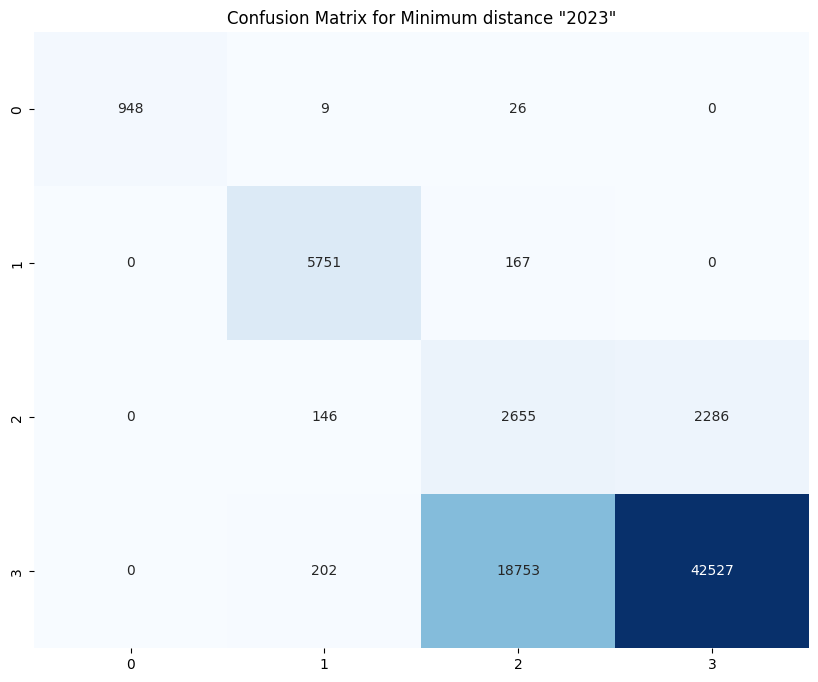

Class 1 - Sensitivity: 0.9643947100712106, Specificity: 1.0 -  F1:0.981874676333506
Class 2 - Sensitivity: 0.9717810070969922, Specificity: 0.9947151823780199 -  F1:0.9564277398968901
Class 3 - Sensitivity: 0.5219186160802044, Specificity: 0.7229428366699325 -  F1:0.1989658273381295
Class 4 - Sensitivity: 0.6916983832666471, Specificity: 0.8093093093093093 -  F1:0.8001693400442166


In [248]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
train_accuracy=train_accuracy_md
conf_matrix = np.array(train_accuracy.getInfo())

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Minimum distance "2023"')
plt.show()

if conf_matrix.shape == (4, 4):
    sensitivities = []
    specificities = []
    f1=[]
    for i in range(4):
        # Extracting values from the confusion matrix for the i-th class
        TN = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
        FP = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
        FN = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
        TP = conf_matrix[i, i]

        # Calculating Sensitivity (Recall) for the i-th class
        sensitivity = TP / (TP + FN)
        sensitivities.append(sensitivity)

        # Calculating Specificity for the i-th class
        specificity = TN / (TN + FP)
        specificities.append(specificity)

        f1=2*TP/(2*TP+FN+FP)
        print(f"Class {i + 1} - Sensitivity: {sensitivity}, Specificity: {specificity} -  F1:{f1}")

else:
    print("Confusion matrix does not have the expected shape (4x4). Check the matrix.")

#CLASSIFYING THE IMAGES WITH RANDOM FOREST &CALCULATING THE CHANGES

In [249]:
clasified_2013=composite_2013.select(bands).classify(classifier)
clasified_2014=composite_2014.select(bands).classify(classifier)
clasified_2015=composite_2015.select(bands).classify(classifier)
clasified_2016=composite_2016.select(bands).classify(classifier)
clasified_2017=composite_2017.select(bands).classify(classifier)
clasified_2018=composite_2018.select(bands).classify(classifier)
clasified_2019=composite_2019.select(bands).classify(classifier)
clasified_2020=composite_2020.select(bands).classify(classifier)
clasified_2021=composite_2021.select(bands).classify(classifier)
clasified_2022=composite_2022.select(bands).classify(classifier)
clasified_2023=composite_2023.select(bands).classify(classifier)

In [250]:
Map2 = geemap.Map()
Map2.centerObject(region, 9)

Map2.addLayerControl()
Map2.addLayer(clasified_2013, vis_parameters_class, 'OG CLIPED COMPOSITE 2013 ')
Map2.addLayer(clasified_2014, vis_parameters_class, 'OG CLIPED COMPOSITE 2014 ')
Map2.addLayer(clasified_2015, vis_parameters_class, 'OG CLIPED COMPOSITE 2015 ')
Map2.addLayer(clasified_2016, vis_parameters_class, 'OG CLIPED COMPOSITE 2016 ')
Map2.addLayer(clasified_2017, vis_parameters_class, 'OG CLIPED COMPOSITE 2017 ')
Map2.addLayer(clasified_2018, vis_parameters_class, 'OG CLIPED COMPOSITE 2018 ')
Map2.addLayer(clasified_2019, vis_parameters_class, 'OG CLIPED COMPOSITE 2019 ')
Map2.addLayer(clasified_2020, vis_parameters_class, 'OG CLIPED COMPOSITE 2020 ')
Map2.addLayer(clasified_2021, vis_parameters_class, 'OG CLIPED COMPOSITE 2021 ')
Map2.addLayer(clasified_2022, vis_parameters_class, 'OG CLIPED COMPOSITE 2022 ')
Map2.addLayer(clasified_2023, vis_parameters_class, 'OG CLIPED COMPOSITE 2023 ')
Map2

Map(center=[41.214298237495086, 26.166221754653815], controls=(WidgetControl(options=['position', 'transparent…

## CALCULATING THE PIXELS FOR EVERY CLASS

In [251]:

def calculate_pixels(classified_image,region):
  image=classified_image.clip(region)
  stats = image.reduceRegion(reducer=ee.Reducer.frequencyHistogram(), geometry=region, scale=30)
  return(stats.getInfo())

def count_pixels(image, region):

    pixel_count = image.reduceRegion(
        reducer=ee.Reducer.count(),
        geometry=region.geometry(),
        scale=30,
        maxPixels=1e13
    )

    count_value = ee.Number(pixel_count.get('B1'))

    return count_value



In [252]:
#~~~~~~~~~~~~~~~2013~~~~~~~~~~~~~~~~
pix_2013=calculate_pixels(clasified_2013,region)
#~~~~~~~~~~~~~~~2014~~~~~~~~~~~~~~~~
pix_2014=calculate_pixels(clasified_2014,region)
#~~~~~~~~~~~~~~~2015~~~~~~~~~~~~~~~~
pix_2015=calculate_pixels(clasified_2015,region)
#~~~~~~~~~~~~~~~2016~~~~~~~~~~~~~~~~
pix_2016=calculate_pixels(clasified_2016,region)
#~~~~~~~~~~~~~~~2017~~~~~~~~~~~~~~~~
pix_2017=calculate_pixels(clasified_2017,region)
#~~~~~~~~~~~~~~~2018~~~~~~~~~~~~~~~~
pix_2018=calculate_pixels(clasified_2018,region)
#~~~~~~~~~~~~~~~2019~~~~~~~~~~~~~~~~
pix_2019=calculate_pixels(clasified_2019,region)
#~~~~~~~~~~~~~~~2020~~~~~~~~~~~~~~~~
pix_2020=calculate_pixels(clasified_2020,region)
#~~~~~~~~~~~~~~~2021~~~~~~~~~~~~~~~~
pix_2021=calculate_pixels(clasified_2021,region)
#~~~~~~~~~~~~~~~2022~~~~~~~~~~~~~~~~
pix_2022=calculate_pixels(clasified_2022,region)
#~~~~~~~~~~~~~~~2023~~~~~~~~~~~~~~~~
pix_2023=calculate_pixels(clasified_2023,region)
pixel_count_result = count_pixels(composite_2013, region)
pixelscount=pixel_count_result.getInfo()

print("Pixel count:", pixel_count_result.getInfo())
pixel_sum_aeria= pixelscount*900/1000000

Pixel count: 2937996


In [253]:
# GET THE CLASSES TOGETHER FOR EVERY YEAR
class_0 = [pix_2013['classification']['0'],pix_2014['classification']['0'],pix_2015['classification']['0'],pix_2016['classification']['0'],pix_2017['classification']['0'],pix_2018['classification']['0'],pix_2019['classification']['0'],pix_2020['classification']['0'],pix_2021['classification']['0'],pix_2022['classification']['0'],pix_2023['classification']['0']]
class_1 = [pix_2013['classification']['1'],pix_2014['classification']['1'],pix_2015['classification']['1'],pix_2016['classification']['1'],pix_2017['classification']['1'],pix_2018['classification']['1'],pix_2019['classification']['1'],pix_2020['classification']['1'],pix_2021['classification']['1'],pix_2022['classification']['1'],pix_2023['classification']['1']]
class_2 = [pix_2013['classification']['2'], pix_2014['classification']['2'], pix_2015['classification']['2'], pix_2016['classification']['2'], pix_2017['classification']['2'], pix_2018['classification']['2'], pix_2019['classification']['2'], pix_2020['classification']['2'], pix_2021['classification']['2'], pix_2022['classification']['2'], pix_2023['classification']['2']]
class_3 = [pix_2013['classification']['3'], pix_2014['classification']['3'], pix_2015['classification']['3'], pix_2016['classification']['3'], pix_2017['classification']['3'], pix_2018['classification']['3'], pix_2019['classification']['3'], pix_2020['classification']['3'], pix_2021['classification']['3'], pix_2022['classification']['3'], pix_2023['classification']['3']]


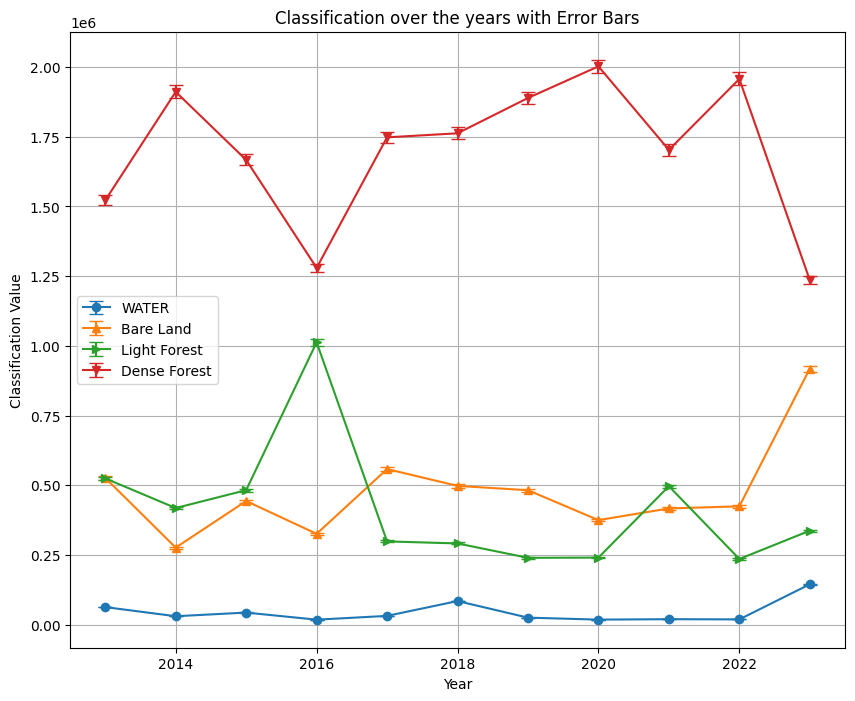

In [254]:
import matplotlib.pyplot as plt

years = list(range(2013, 2024))
plt.figure(figsize=(10, 8))

acuracy = train_accuracy_rf.accuracy().getInfo()

error =1-acuracy

# Plotting with error bars for each class
plt.errorbar(years, class_0, yerr=[error*x for x in class_0], fmt='o-', capsize=5, label='WATER')
plt.errorbar(years, class_1, yerr=[error*x for x in class_1], fmt='^-', capsize=5, label='Bare Land')
plt.errorbar(years, class_2, yerr=[error*x for x in class_2], fmt='>-', capsize=5, label='Light Forest')
plt.errorbar(years, class_3, yerr=[error*x for x in class_3], fmt='v-', capsize=5, label='Dense Forest')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Classification Value')
plt.title('Classification over the years with Error Bars')
plt.legend()
plt.grid(True)
plt.show()


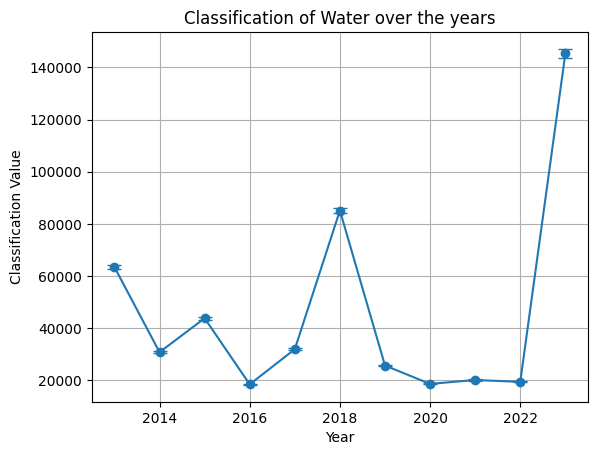

In [255]:
years = list(range(2013, 2024))

plt.errorbar(years, [int(x) for x in class_0], yerr=[error*x for x in class_0], fmt='o-', capsize=5, label='WATER')
plt.title('Classification of Water over the years')
plt.xlabel('Year')
plt.ylabel('Classification Value')
plt.grid(True)
plt.show()

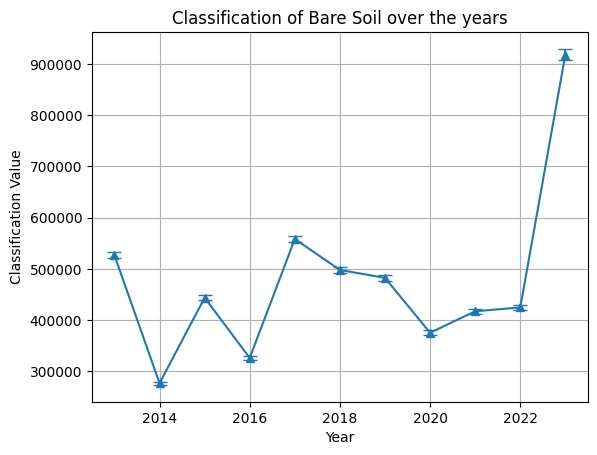

In [256]:
years = list(range(2013, 2024))

plt.errorbar(years, [int(x) for x in class_1], yerr=[error*x for x in class_1], fmt='^-', capsize=5, label='Bare Land')
plt.title('Classification of Bare Soil over the years')
plt.xlabel('Year')
plt.ylabel('Classification Value')
plt.grid(True)
plt.show()

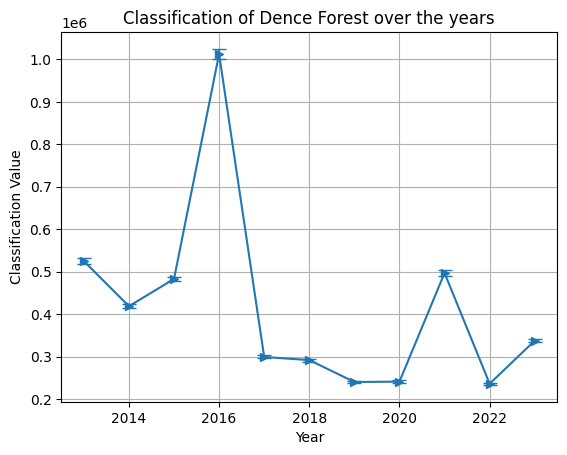

In [257]:
years = list(range(2013, 2024))

plt.errorbar(years, [int(x) for x in class_2], yerr=[error*x for x in class_2], fmt='>-', capsize=5, label='Dense Forest')
plt.title('Classification of Dence Forest over the years')
plt.xlabel('Year')
plt.ylabel('Classification Value')
plt.grid(True)
plt.show()

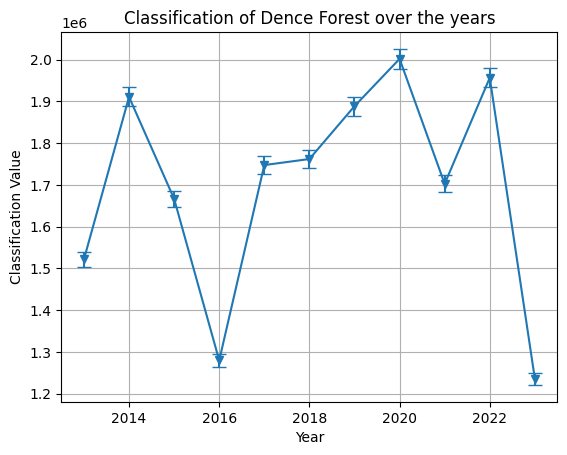

In [258]:
years = list(range(2013, 2024))

plt.errorbar(years, [int(x) for x in class_3], yerr=[error*x for x in class_3], fmt='v-', capsize=5, label='Light Forest')
plt.title('Classification of Dence Forest over the years')
plt.xlabel('Year')
plt.ylabel('Classification Value')
plt.grid(True)
plt.show()

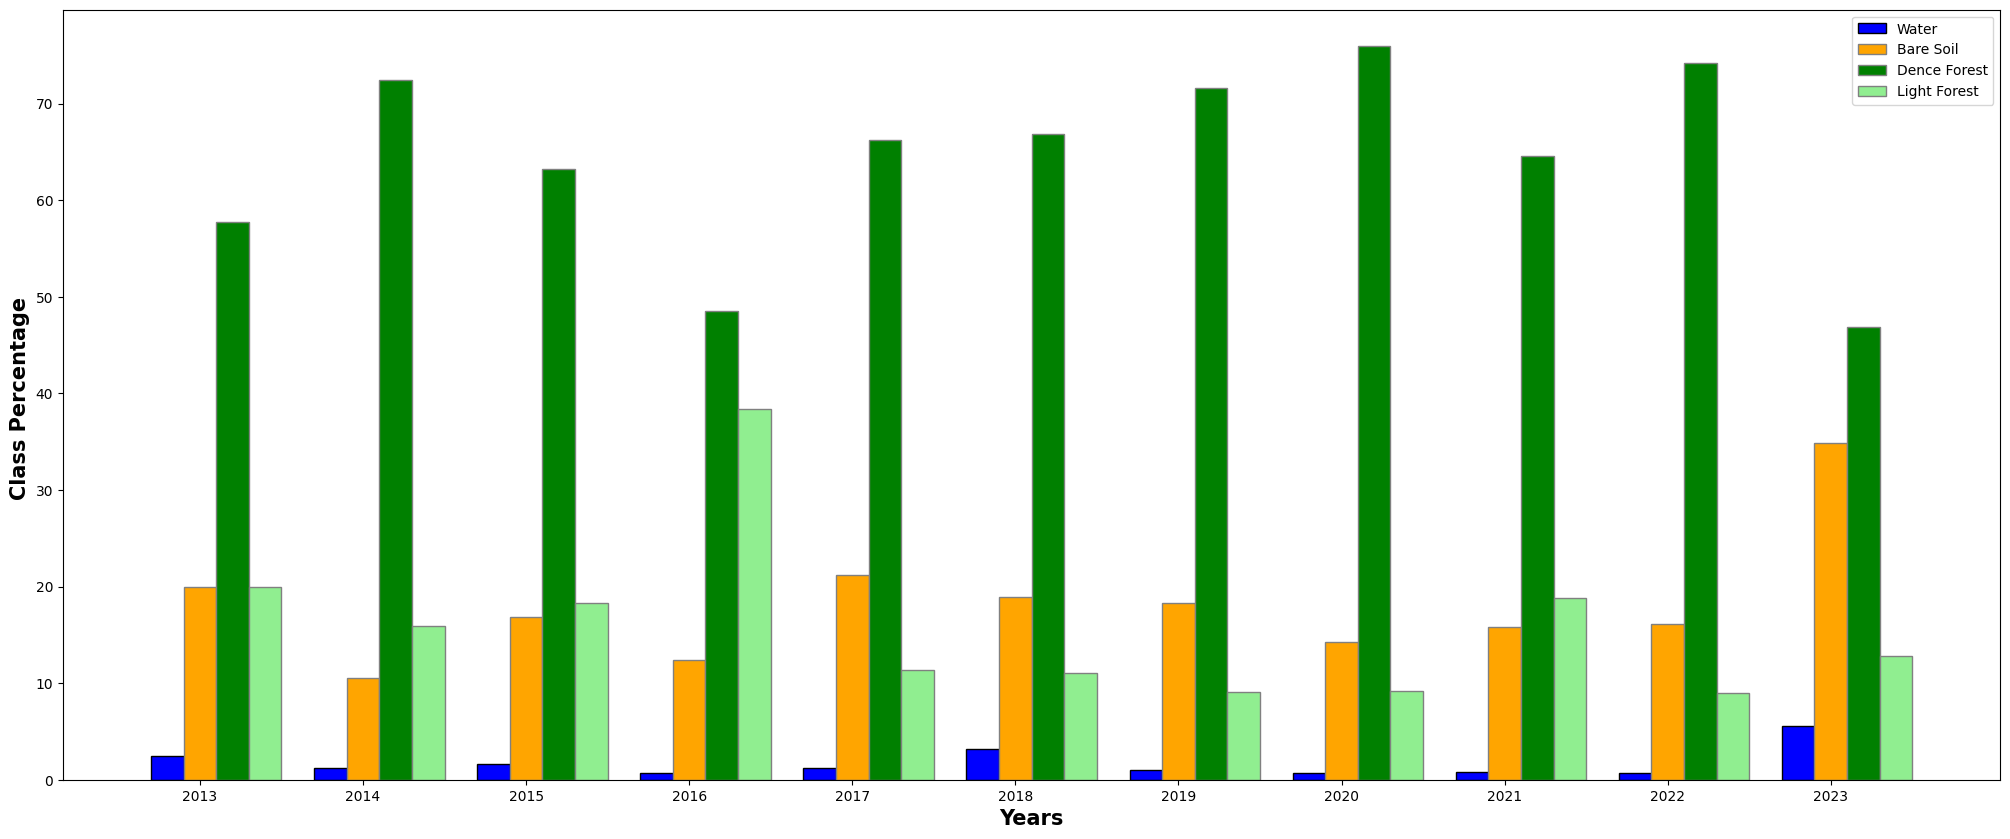

In [259]:

# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(25, 10))
sum_2013=int(int(class_0[0])+int(class_1[0])+int(class_2[0])+int(class_3[0]))
sum_2014=int(class_0[1]+class_1[1]+class_2[1]+class_3[1])
sum_2015=int(class_0[2]+class_1[2]+class_2[2]+class_3[2])
sum_2016=int(class_0[3]+class_1[3]+class_2[3]+class_3[3])
sum_2017=int(class_0[4]+class_1[4]+class_2[4]+class_3[4])
sum_2018=int(class_0[5]+class_1[5]+class_2[5]+class_3[5])
sum_2019=int(class_0[6]+class_1[6]+class_2[6]+class_3[6])
sum_2020=int(class_0[7]+class_1[7]+class_2[7]+class_3[7])
sum_2021=int(class_0[8]+class_1[8]+class_2[8]+class_3[8])
sum_2022=int(class_0[9]+class_1[9]+class_2[9]+class_3[9])
sum_2023=int(class_0[10]+class_1[10]+class_2[10]+class_3[10])
# set height of bar
Water = [class_0[0]/sum_2013, class_0[1]/sum_2014, class_0[2]/sum_2015, class_0[3]/sum_2016, class_0[4]/sum_2017,class_0[5]/sum_2018, class_0[6]/sum_2019, class_0[7]/sum_2020, class_0[8]/sum_2021,class_0[9]/sum_2022,class_0[10]/sum_2023]
BS = [class_1[0]/sum_2013, class_1[1]/sum_2014, class_1[2]/sum_2015, class_1[3]/sum_2016, class_1[4]/sum_2017,class_1[5]/sum_2018, class_1[6]/sum_2019, class_1[7]/sum_2020, class_1[8]/sum_2021,class_1[9]/sum_2022,class_1[10]/sum_2023]
LF = [class_2[0]/sum_2013, class_2[1]/sum_2014, class_2[2]/sum_2015, class_2[3]/sum_2016, class_2[4]/sum_2017,class_2[5]/sum_2018, class_2[6]/sum_2019, class_2[7]/sum_2020, class_2[8]/sum_2021,class_2[9]/sum_2022,class_2[10]/sum_2023]
DF = [class_3[0]/sum_2013, class_3[1]/sum_2014, class_3[2]/sum_2015, class_3[3]/sum_2016, class_3[4]/sum_2017,class_3[5]/sum_2018, class_3[6]/sum_2019, class_3[7]/sum_2020, class_3[8]/sum_2021,class_3[9]/sum_2022,class_3[10]/sum_2023]

# Set position of bar on X axis
br1 = np.arange(len(Water))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, [x*100 for x in Water], color ='b', width = barWidth,
		edgecolor ='black', label ='Water')
plt.bar(br2, [x*100 for x in BS], color ='orange', width = barWidth,
		edgecolor ='grey', label ='Bare Soil')
plt.bar(br3, [x*100 for x in DF], color ='g', width = barWidth,
		edgecolor ='grey', label ='Dence Forest')
plt.bar(br4, [x*100 for x in  LF], color ='lightgreen', width = barWidth,
		edgecolor ='grey', label ='Light Forest')
# Adding Xticks
plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Class Percentage ', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Water))],
		['2013','2014','2015', '2016', '2017', '2018', '2019','2020','2021','2022','2023'])

plt.legend()
plt.show()

# CALCULATING THE CHANGES IN THE TIMELINES OF INTEREST

In [260]:
Map = geemap.Map()
Map.centerObject(region, 9)

# Apply the mask to set class 0 pixels to NaN
diff_2022_23 = (clasified_2023.subtract(clasified_2023.eq(0))).subtract(clasified_2022.subtract(clasified_2022.eq(0)))
diff_2013_14 = (clasified_2014.subtract(clasified_2014.eq(0))).subtract(clasified_2013.subtract(clasified_2013.eq(0)))
diff_2014_16 = (clasified_2016.subtract(clasified_2016.eq(0))).subtract(clasified_2014.subtract(clasified_2014.eq(0)))
diff_2016_20 = (clasified_2020.subtract(clasified_2020.eq(0))).subtract(clasified_2016.subtract(clasified_2016.eq(0)))
diff_2020_21 = (clasified_2021.subtract(clasified_2021.eq(0))).subtract(clasified_2020.subtract(clasified_2020.eq(0)))
# Calculate pixel-wise difference

landcover_palette_2 = [
    'ff7f00',  # Class 1: bare_land
    '70BC6D',  # Class 2: light_forest
    '2c4b2b',  # Class 3: dense_forest

]

vis_parameters_class_2 = {'palette': landcover_palette_2,'min':1,'max':3 }


palette = [
    '8b0000',  # Class -2: bare_land
    'FFA500',  # Class -1: light_forest
    'FFFFFF',  # Class 0: dense_forest
    '0076f0',  # Class 1: water
    '001f3f',  # Class 2: bare_land

]
# Display the difference


Map.addLayer(diff_2022_23, {'min': -2, 'max': 2, 'palette': palette}, 'Difference 2022-23')
Map.addLayer(diff_2013_14, {'min': -2, 'max': 2, 'palette': palette}, 'Difference 2013-14')
Map.addLayer(diff_2014_16, {'min': -2, 'max': 2, 'palette': palette}, 'Difference 2014-16')
Map.addLayer(diff_2016_20, {'min': -2, 'max': 2, 'palette': palette}, 'Difference 2016-20')
Map.addLayer(diff_2020_21, {'min': -2, 'max': 2, 'palette': palette}, 'Difference 2020 21')

Map.addLayerControl()

Map

Map(center=[41.214298237495086, 26.166221754653815], controls=(WidgetControl(options=['position', 'transparent…

In [267]:
pix_2022_23=calculate_pixels(diff_2022_23,region)
pix_2013_14=calculate_pixels(diff_2013_14,region)
pix_2014_16=calculate_pixels(diff_2014_16,region)
pix_2020_21=calculate_pixels(diff_2020_21,region)
print('####################### 2023-22 ############################')
print(int(pix_2022_23['classification']['-2'])*900/1000000 ,'km^2    FOR -2')
print(int(pix_2022_23['classification']['-1'])*900/1000000 ,'km^2    FOR -1')
print(int(pix_2022_23['classification']['0'])*900/1000000 , 'km^2    FOR 0')
print(int(pix_2022_23['classification']['1'])*900/1000000 , 'km^2     FOR 1')
print(int(pix_2022_23['classification']['2'])*900/1000000 , 'km^2     FOR 2')
print('####################### 2014-13 ############################')
print(int(pix_2013_14['classification']['-2'])*900/1000000 , 'km^2      FOR -2')
print(int(pix_2013_14['classification']['-1'])*900/1000000 , 'km^2      FOR -1')
print(int(pix_2013_14['classification']['0'])*900/10000000 , 'km^2    FOR 0')
print(int(pix_2013_14['classification']['1'])*900/1000000 ,  'km^2     FOR 1')
print(int(pix_2013_14['classification']['2'])*900/1000000 ,  'km^2      FOR 2')
print('####################### 2016-14 ############################')
print(int(pix_2014_16['classification']['-2'])*900/1000000 ,'km^2      FOR -2')
print(int(pix_2014_16['classification']['-1'])*900/1000000 ,'km^2     FOR -1')
print(int(pix_2014_16['classification']['0'])*900/1000000 , 'km^2    FOR 0')
print(int(pix_2014_16['classification']['1'])*900/1000000 , 'km^2     FOR 1')
print(int(pix_2014_16['classification']['2'])*900/1000000 , 'km^2      FOR 2')
print('####################### 2021-20 ############################')
print(int(pix_2020_21['classification']['-2'])*900/100000 , 'km^2     FOR -2')
print(int(pix_2020_21['classification']['-1'])*900/100000 , 'km^2    FOR -1')
print(int(pix_2020_21['classification']['0'])*900/1000000 , 'km^2   FOR 0')
print(int(pix_2020_21['classification']['1'])*900/1000000 , 'km^2     FOR 1')
print(int(pix_2020_21['classification']['2'])*900/1000000 , 'km^2     FOR 2')

####################### 2023-22 ############################
395.4321 km^2    FOR -2
346.9392 km^2    FOR -1
1441.215 km^2    FOR 0
65.4219 km^2     FOR 1
18.8379 km^2     FOR 2
####################### 2014-13 ############################
22.1211 km^2      FOR -2
172.701 km^2      FOR -1
154.13922 km^2    FOR 0
421.9803 km^2     FOR 1
165.852 km^2      FOR 2
####################### 2016-14 ############################
41.9112 km^2      FOR -2
697.9059 km^2     FOR -1
1450.8171 km^2    FOR 0
138.6576 km^2     FOR 1
25.3647 km^2      FOR 2
####################### 2021-20 ############################
648.441 km^2     FOR -2
3491.703 km^2    FOR -1
1798.6518 km^2   FOR 0
117.315 km^2     FOR 1
32.1759 km^2     FOR 2
